In [8]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from src.linear_algebra.svd_core import compute_truncated_svd
from src.ml.clustering import run_kmeans
from src.ml.classification import (
    train_logistic_regression,
    evaluate_model
)


In [9]:
X = pd.read_csv("../Data/processed/X_processed.csv").values


In [10]:
# Reduce dimensionality
U_reduced, _, _ = compute_truncated_svd(X, n_components=10)

# Cluster in reduced space
cluster_labels, _ = run_kmeans(U_reduced[:, :2], n_clusters=3)

print("Unique pseudo-classes:", np.unique(cluster_labels))


Unique pseudo-classes: [0 1 2]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    U_reduced[:, :5],      # use first 5 SVD components
    cluster_labels,
    test_size=0.2,
    random_state=42,
    stratify=cluster_labels
)


In [12]:
model = train_logistic_regression(X_train, y_train)


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [13]:
accuracy, confusion = evaluate_model(model, X_test, y_test)

print("Classification Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)


Classification Accuracy: 0.9875776397515528
Confusion Matrix:
 [[64  0  0]
 [ 1 30  0]
 [ 1  0 65]]


In [14]:
results_df = pd.DataFrame(confusion)
results_df.to_csv(
    "../results/tables/confusion_matrix_logistic.csv",
    index=False
)


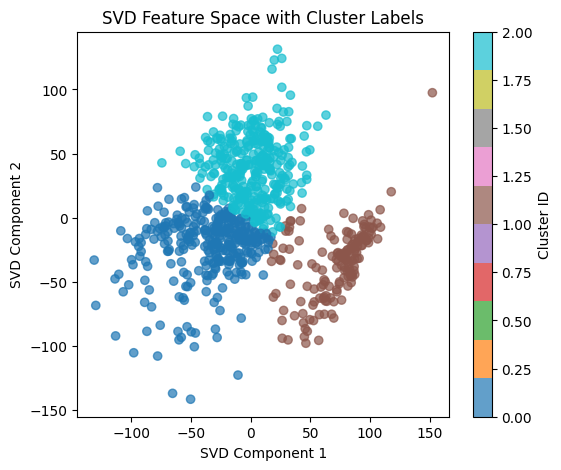

In [15]:
import matplotlib.pyplot as plt

# Use first 3 SVD components
X_vis = U_reduced[:, :3]

fig = plt.figure(figsize=(6,5))
scatter = plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    c=cluster_labels,
    cmap="tab10",
    alpha=0.7
)

plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("SVD Feature Space with Cluster Labels")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [ ]:
import pandas as pd

svd_df = pd.DataFrame(
    U_reduced[:, :3],
    columns=["SVD1", "SVD2", "SVD3"]
)
svd_df["Cluster"] = cluster_labels


svd_df.groupby("Cluster").mean()


,SVD1,SVD2,SVD3
Cluster,,,
0,-35.862034,-23.188494,4.038868
1,70.542380,-35.105351,-14.046420
2,1.207072,38.693617,2.730038


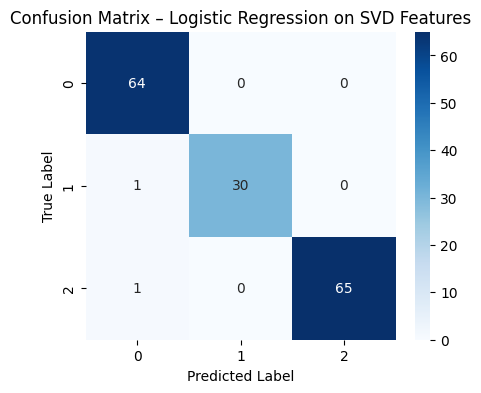

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(
    confusion,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Logistic Regression on SVD Features")
plt.show()
